# Python Paradigms

Liste des différents paradigmes, syntaxes, procédures et modules qui composent le language

---

## Print

Quelque détails au sujet de `print()`

---

#### Arguments

Par défaut, print() termine avec un retour de ligne `\n`

In [1]:
print("Hello")
print("There")

Hello
There


Et sépare les variables par `" "`

In [2]:
print("Hello", "There")

Hello There


Mais on peut changer ça avec les arguments `end` et `sep`

In [3]:
print("Hello", end=" ")
print("There")

Hello There


In [4]:
print("Hello", "There", sep="\n")

Hello
There


---

#### F-string

Il est possible d'imprimer `"var = ..."` directement dans une f-string

In [5]:
x = 1
print(f"Valeur de x: {x = }")

Valeur de x: x = 1


---

#### String comparaison

Des comparaisons booléenes et de taille peuvent être faites avec des `string`

In [6]:
print("A" > "a")
print("a" < "b")
print("*" < "B")

False
True
True


Python trie comme suit (du plus petit au plus grand):
  - ' ', '!', '#', ... , '/',
  - '0', '1', '2', ... , '9',
  - ':', ';', '<', ... , '@',
  - 'A', 'B', 'C', ... , 'Z',
  - '[', '^', '_', ... , '`', 
  - 'a', 'b', 'c', ... , 'z',
  - '{', '|', '}', '~'


---

## Functions

Les fonctions devraient respecter quelques principes:
  - Avoir une seule responsabilité
  - Être testée!
  - Avoir des noms de variables internes différents des variables externes
  - Être correctement documentées avec une docstring
  - Si possible, ne pas utiliser `global`

---

#### Docstring

Les docstring doivent suivre la même structure standard

In [7]:
def foo():
    '''
    Description du rôle de la fonction
    
    Args:
        arg1 (type): description
        arg2: (type): description
        [...]
    
    Returns:
        output (type): 'return' format, if [...] or not [...]
    
    Raises:
        error_type: when [...] happens
    '''

Exemple

In [8]:
def convert_temp(t, unit):
    '''
    Convert a temperature between Celsius, Fahrenheit, and Kelvin.

    Args:
        t (float): The temperature value to convert.
        unit (str): The current unit of temperature; must be one of "celsius", 
                    "fahrenheit", or "kelvin".

    Returns:
        tuple: Contains converted temperatures as (int). The specific format depends on the input unit:
            - If input is celsius, returns: (kelvins, fahrenheit).
            - If input is fahrenheit, returns: (celsius, kelvin).
            - If input is kelvin, returns: (celsius, fahrenheit).

    Raises:
        "c'est quoi cette unité??": If the provided unit is not recognized.
        "error": If the temperature value is too low to be physically possible.
    '''
    pass

La documentation d'une fonction peut être accédée par `convert_temp.__doc__`

---

#### Tests

Il est possible de tester une fonction en vérifiant que pour un paramètre connu, elle ait un return connu.\
Pour ce faire, on utilise la syntaxe suivante (pytest cherche des fonction préfixées par `test_\<fonction>` ou des classes `Test` )

In [9]:
import pytest

def divise(a, b):
    return a / b

# testing function for divise()
def test_divise():
    assert divise(3, 3) == 1.0
    assert divise(3, 2) != 69

Ensuite, on peut run les tests comme suit: `pytest file.py`

---

#### Global variables

Une fonction peut seulement lire les variables du code principal, pas les modifier, pour palier à ça, on peut déclarer une variable comme globale, qui permet à la fonction de modifier cette variable

In [10]:
x = 0
def foo():
    global x
    x += 1

foo()
print(x)

1


Cette méthode est déconseillée car il est possible d'effacer d'autres variable sans le vouloir, ou causer des problèmes d'intégration, etc...

---

#### Lambda functions

Pour déclarer des fonctions courtes efficacement, il est possible de déclarer une fonction `lambda` comme une variable. Ces fonctions sont anonymes et non répértoriées

In [11]:
func = lambda x, y: (3 * x + y)
print(func(2, 3))

9


---

## Lists

Les listes sont des collections de pointeurs vers des variables dans la mémoire système, par exemple, `lst = [0, "foo", ["a", 4]]` contient in pointeur vers `0` et `"foo"` (non-mutables) ainsi qu'un pointeur vers la liste (mutable) `["a", 4]`.

Si une copie de `lst` est faite (`lst1 = lst.copy()`) une modification aux vatiales non-mutables de style `lst[0] += 1` ne sera pas reproduite sur `lst1[0]`.\
Alors que `lst[2] += [6]` modifiera la liste *référencée* par `lst` et `lst1`, changeant donc visuellement le contenu de `lst` et `lst1`.

---

#### List methods

Les listes sont munies de plusieurs différentes méthodes.

Celles qui modifient la liste sur laquelle elles sont appliquées:
  - `lst.sort()` : Trie la liste
  - `lst.reverse()` : Inverse la liste `lst = lst[::-1]`
  - `lst.append(var)` : Ajoute var à la fin de lst `lst += [var]`
  - `lst.pop(index)` : Supprime et retourne l'élément à l'index spécifié
  - `lst.insert(index, var)` : Insère var à index `lst[index:index] = [var]`
  - `lst.remove(var)` : Supprime la première occurrence de var
  - `lst.extend(lst1)` : Ajoute tous les éléments d'une autre liste à la fin de la liste `lst = lst + lst1`

In [12]:
lst = [1, 2, 3, 1, 2, 3]

lst.sort()
print(lst)

lst.reverse()
print(lst)

lst1 = lst.copy()

lst.append(8)
print(lst)

lst.pop(4)
print(lst)

lst.insert(4, 7)
print(lst)

lst.remove(7)
print(lst)

lst.extend(lst1)
print(lst)


[1, 1, 2, 2, 3, 3]
[3, 3, 2, 2, 1, 1]
[3, 3, 2, 2, 1, 1, 8]
[3, 3, 2, 2, 1, 8]
[3, 3, 2, 2, 7, 1, 8]
[3, 3, 2, 2, 1, 8]
[3, 3, 2, 2, 1, 8, 3, 3, 2, 2, 1, 1]


Celles qui retounent une liste ou valeur:
  - `count = lst.count(var)` : Conte le nobre d'occurences de var
  - `index = lst.index(var)` : Retourne l'index de la première occurence de var
  - `list = lst.copy()` : Retourne une copie superficielle de la liste
  - `list = lst.deepcopy()` : Du module copy, copie itérativement tout le contenu de lst

In [13]:
lst = [1, 2, 3, 1, 2, 3]

print(lst.count(1))
print(lst.index(2))
print(lst.copy())

2
1
[1, 2, 3, 1, 2, 3]


Il est aussi possible de vérifier si un élément est dans une liste:

In [14]:
lst = [1, 2, 3]
print(1 in lst)

True


---

#### List operations

Il est possible d'utiliser des opértateurs mathématiques sur les listes:
  - `lst = lst1 + lst2` : crée une nouvelle liste composée des pointeurs de lst1 et lst2
  - `lst = [lst1, lst` : cette liste ne contient que des pointeurs vers lst1 et lst2
  - `lst = lst1 * 2` : lst = [lst1, lst1]
  - `lst1 = lst2` : crée un pointeur vers lst2

---

#### List comprehension

La compréhension de liste permet de construire des listes sur une seule ligne. Plusieurs opérateurs sont permis:
  - `for`
  - `if`, `elif` ou `else`

In [15]:
lst = [i * 4 for i in range(3)]
# Equivalent to:
# for i in range(3):  
#     lst.append(i * 4)  

lst1 = [i * 4 for i in lst if i % 2 == 0]  
# Equivalent to:
# for i in lst:  
#     if i % 2 == 0:  
#         lst1.append(i * 4)  

lst2 = [i + j for i in lst for j in lst1]  
# Equivalent to:
# for i in lst:  
#     for j in lst1:  
#         lst2.append(i + j)

---

## Dicts and Tuples

Manipulation de dictionnaires et tuples

---

#### Tuples

Les tuples sont comme des listes, sauf qu'ils ne sont pas mutables. on peut aussi transformer n'importe quel objet itérable en un tuple `tuple()`\
Toutes les méthodes qui ne modifient pas les listes peuvent donc être utilisés sur des tuples, par exemple:
  - `len()`
  - `count(var)`
  - `index(var)`
  - etc...

Il est possible de "unpack" des items d'un tuple:

In [16]:
a = (2, 3)
b, c = a

print(b, c)

2 3


---

#### Dictionaries

Ils agissent comme les listes et ne stockent que des pointeurs vers les valeurs stockées, les clés doivent être **uniques** et **non-mutables** car elles vont être hashées.\
Il est aussi possible de créér un dictionnaire par la compréhension: `{i: j for i, j in enumerate(foo)}`

Il y a quelque méthodes associées aux dictionnaires:
  - `d.get(key)` : retourne la valeur assossiée à la clé `key`, `None` si la clé n'existe pas
  - `del d[key]` : supprime la paire située à `key` (aussi possible: `d.pop(key)`)
  - `d.values()` : itérable contenant toutes les valeurs de `d`
  - `d.keys()` : itérable contenant toutes les clés de `d`
  - `d.items()` : itérable contenant des tuples `(clé, valeur)`

---

## Exceptions

Il faut distinguer les erreurs (`SyntaxError`) dues à une erreur de syntaxe, et toute autre exception, ici on parle des exceptions

---

#### Hierarchy

Il existe toute une série d'exceptions qui sont classées sous forme de groupes et sous-groupes:\
(Une exception comme `ModuleNotFoundError` est aussi une `ImportError`, une `Exception` et une `BaseException` par exemple)

---

#### Try

Pour gérer les exceptions, on utilise la syntaxe `try: ... except:`

In [17]:
try:
    '''Things to do that might fail'''
except IndexError: # or any other exception
    '''Do this if it fails'''
except (OtherException, TooPoorError, TryHarderError): # any tuple of exceptions
    '''Do smth else'''
else: # optionnal
    '''Do this if none of the except blocks were triggered'''
finally: # optionnal
    '''What to do after the try block'''

Le bloc `finally` est **toujours** exécuté même si un statement `return`, `exit()` ou autre est appelé par `except` ou `else`

---

#### Raise and `Exception()`

Il est possible de créér une exception non-vanilla en utilisant `raise` dans le bloc `try`

In [18]:
try:
    '''do stuff here'''
    something_went_wrong = True
    
    if something_went_wrong:
        raise Exception("Description: the user is stoopid")
except Exception:
    '''what to do if Exception'''

Il est aussi possible de récupérer la description de n'importe quelle exception:

In [19]:
try:
    '''do stuff here'''
    something_went_wrong = True
    
    if something_went_wrong:
        raise Exception("The user is stoopid")
except Exception as string:
    print(string)

The user is stoopid


---

## Numpy and Matplotlib

Introduction à numpy et matplotlib

---

#### Numpy

"The fundamental package for scientific computing with Python", utilisé pour toute sorte d'opérations mathématiques avec des variables

In [20]:
import numpy as np

Fondamentalement, numpy introduit un nouveau type de données: `ndarray`, qui se comporte comme un vecteur/matrice, on peut par exemple appliquer n'importe quelle fonction sur tous les éléments d'un array d'un coup

In [21]:
arr = np.array([1, 2, 3, 4])
square = lambda x: x**2
print(square(arr))

[ 1  4  9 16]


Noter que la taille d'un `ndarray` est non-mutable et doit être définie à sa création! De plus, un array va se régler au type le plus général dans l'itérable utilisé pour sa création

In [22]:
print(np.array([1, 2, "3"]))

['1' '2' '3']


---

##### One-dimensional arrays

Il y a plusieurs méthodes pour créer des vecteurs à une dimension (une ligne)

In [23]:
dim = 6
val = "aaa"
print(np.zeros(dim))
print(np.ones(dim))
print(np.full(dim, val))
print(np.empty(dim)) # valeurs aléatoires
print(np.linspace(start=0, stop=5, num=4)) # distibution régulière ~ "range"

[0. 0. 0. 0. 0. 0.]
[1. 1. 1. 1. 1. 1.]
['aaa' 'aaa' 'aaa' 'aaa' 'aaa' 'aaa']
[1. 1. 1. 1. 1. 1.]
[0.         1.66666667 3.33333333 5.        ]


---

##### Multi-dimensional arrays

Noter que `dim` peut être autre chose qu'un simple `int`

In [24]:
dim = [2, 3, 2]
print(np.zeros(dim))

[[[0. 0.]
  [0. 0.]
  [0. 0.]]

 [[0. 0.]
  [0. 0.]
  [0. 0.]]]


Il est possible d'adresser différentes parties d'un array via du "slicing étendu" 

In [25]:
arr = np.array([["a", "b", "c"], ["d", "e", "f"], ["g", "h", "i"]])
print(arr)
print()
print(arr[1:, :]) # lignes 3 et 4
print()
print(arr[:, 1]) # deuxièmme colonne

[['a' 'b' 'c']
 ['d' 'e' 'f']
 ['g' 'h' 'i']]

[['d' 'e' 'f']
 ['g' 'h' 'i']]

['b' 'e' 'h']


On peut connaître le nombre de dimensions ("profondeur") ou la forme d'un array

In [26]:
print(arr.ndim)
print(arr.shape)

2
(3, 3)


Et même créer des matrices identités

In [27]:
print(np.eye(3))

[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]


---

##### Array operations

Comme vu au dessus, les opérations simultanées sur tous les éléments sont très faciles avec numpy\
Pour effectuer des opérations comme un produit matriciel, il faut utiliser les méthodes de `np.linalg`

In [28]:
matrix = np.eye(3)
print(np.linalg.det(matrix)) # détérminant
print(np.linalg.eigvals(matrix)) # valeurs propres

1.0
[1. 1. 1.]


Il est aussi possible d'effectuer des opérations booléennes

In [29]:
arr = np.random.rand(4, 4)
print(arr)
print()
print(arr > 0.3)

[[0.74676331 0.43801167 0.88774315 0.14197761]
 [0.26777805 0.06152999 0.4562059  0.74144256]
 [0.22774098 0.63695731 0.19833812 0.11588101]
 [0.63076455 0.17900023 0.91830811 0.97535992]]

[[ True  True  True False]
 [False False  True  True]
 [False  True False False]
 [ True False  True  True]]


In [30]:
rounded = np.empty_like(arr)
rounded[arr >= 0.5] = 1; rounded[arr < 0.5] = 0
print(rounded)

[[1. 0. 1. 0.]
 [0. 0. 0. 1.]
 [0. 1. 0. 0.]
 [1. 0. 1. 1.]]


On peut `reshape` des arrays si le nombre d'éléments reste le même

In [31]:
arr = np.reshape(arr, [2, 2, 4]) # noter que 4x4 = 16 = 2x2x4
print(arr)

[[[0.74676331 0.43801167 0.88774315 0.14197761]
  [0.26777805 0.06152999 0.4562059  0.74144256]]

 [[0.22774098 0.63695731 0.19833812 0.11588101]
  [0.63076455 0.17900023 0.91830811 0.97535992]]]


Enfin, on peut concaténer des arrays entre eux

In [32]:
x = np.array([1, 2, 3])
y = np.array([4, 5, 6])
print(np.concatenate((x, y)))

[1 2 3 4 5 6]


In [33]:
a = np.array([[1, 2], [3, 4]])
b = np.array([[5, 6], [7, 8]])
print(np.concatenate((a, b), axis=0))
print(np.concatenate((a, b), axis=1))

[[1 2]
 [3 4]
 [5 6]
 [7 8]]
[[1 2 5 6]
 [3 4 7 8]]


---

#### Matplotlib

"Matplotlib is a comprehensive library for creating static, animated, and interactive visualizations in Python. Matplotlib makes easy things easy and hard things possible."

In [34]:
import matplotlib.pyplot as plt

##### Multiple line plot

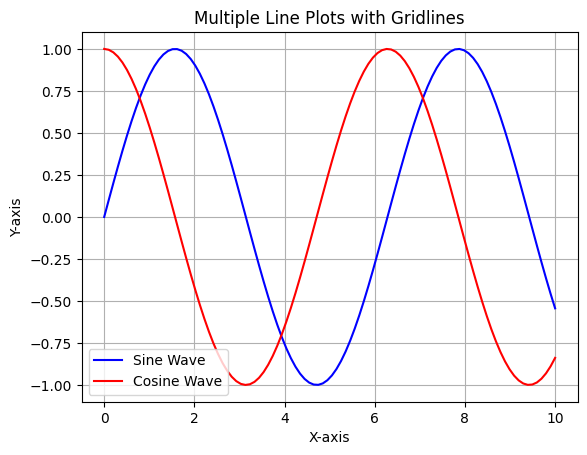

In [35]:
x = np.linspace(0, 10, 100)
y1 = np.sin(x)
y2 = np.cos(x)

plt.figure()
plt.plot(x, y1, label='Sine Wave', color='blue')
plt.plot(x, y2, label='Cosine Wave', color='red')

# Add title and labels
plt.title('Multiple Line Plots with Gridlines')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')

# Display legend
plt.legend()

# Enable gridlines
plt.grid()

# Show the plot
plt.show()

##### Scatter plot

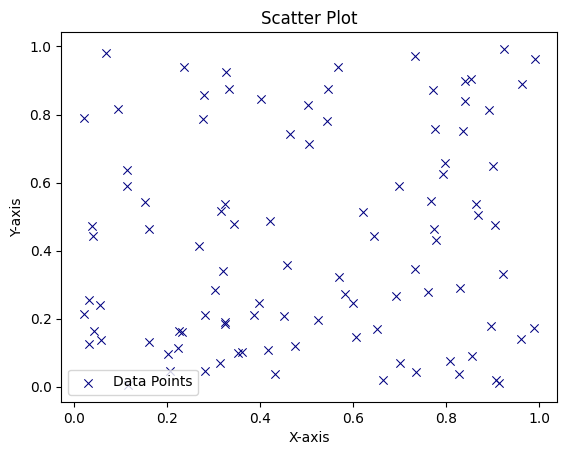

In [71]:
x = np.random.rand(100)
y = np.random.rand(100)

plt.figure()
plt.scatter(x, y, color='navy', marker='x', linewidth=0.75, label='Data Points')

# Add title and labels
plt.title('Scatter Plot')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')

# Display legend
plt.legend(loc='lower left')

# Show the plot
plt.show()

##### Histogram plot

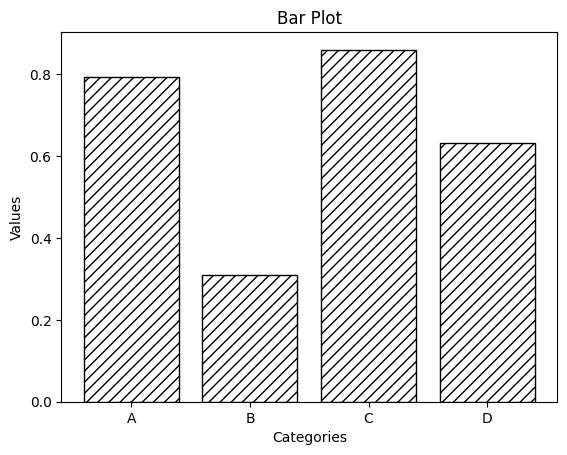

In [69]:
categories = ['A', 'B', 'C', 'D']
values = np.random.rand(4)

plt.figure()
plt.bar(categories, values, color='none', edgecolor='black', hatch='///')

# Add title and labels
plt.title('Bar Plot')
plt.xlabel('Categories')
plt.ylabel('Values')

# Display the plot
plt.show()

##### Subplots

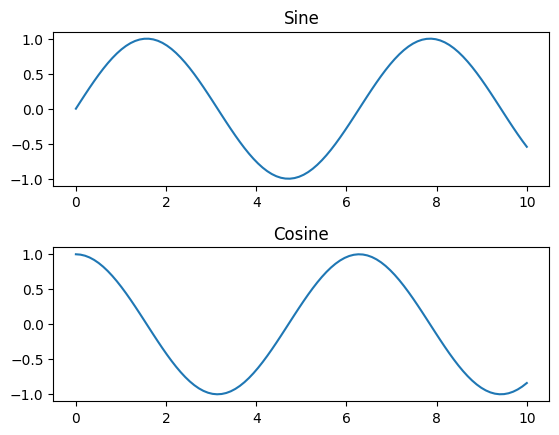

In [65]:
x = np.linspace(0, 10, 100)

# Create a figure with two subplots
fig = plt.figure()

# First subplot (top-left corner)
plt.subplot(2, 1, 1)
plt.plot(x, np.sin(x))
plt.title('Sine')

# Second subplot (bottom-left corner)
plt.subplot(2, 1, 2)
plt.plot(x, np.cos(x))
plt.title('Cosine')

fig.subplots_adjust(wspace=0.3, hspace=0.4)

# Show the plot
plt.show()

##### Heatmap

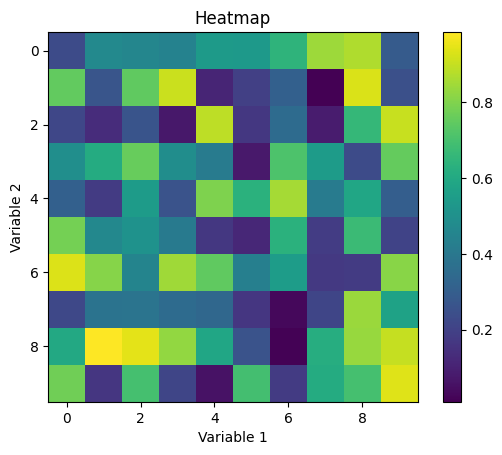

In [77]:
import matplotlib.pyplot as plt
import numpy as np

# Sample data: A 2D array where each row and column is indexed by variables, and the value of the array represents the intensity
data = np.random.rand(10, 10)

# Create a figure and axis
fig, ax = plt.subplots()

# Create the heatmap
cax = ax.imshow(data, cmap='viridis', interpolation='nearest')

# Add colorbar to represent values
fig.colorbar(cax)

# Add titles and labels
ax.set_title('Heatmap')
ax.set_xlabel('Variable 1')
ax.set_ylabel('Variable 2')

# Display the heatmap
plt.show()

##### Advanced usage

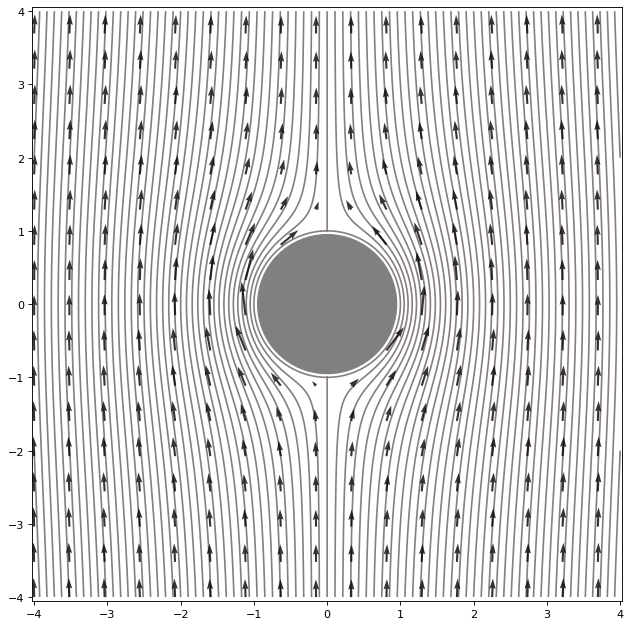

In [87]:
from matplotlib import colors

# variables 1
v_density = 30
l_density = 80
p_density = 80
d_density = 500
c_pos = (1, 1)
c_radius = 0.95

# variables 2
l_viscosity = 148.1408929
rho_a = 7850
rho_g = 1260
radius = 0.0005
pi = np.pi
g = 9.81
sum_f = (
    (
        -
        (rho_g * 2 * (4/3) * pi * radius**3 * g)
        -
        (6 * pi * radius * l_viscosity)
        +
        (rho_a * (4/3) * 2 * pi * radius**3 * g)
    )
)

# main
def flow(psi, mask = None, x=np.linspace(-4, 4, d_density), y=np.linspace(-4, 4, d_density), h=1e-10):
    x_axis, y_axis = np.meshgrid(x, y)
    if mask:
        x_axis, y_axis = (
            np.ma.masked_where(mask(x_axis, y_axis), x_axis),
            np.ma.masked_where(mask(x_axis, y_axis), y_axis)
        )

    # complex analysis navier-stokes
    u_axis = - (psi(x_axis, y_axis + h) - psi(x_axis, y_axis - h)) / (2 * h)
    v_axis = (psi(x_axis + h, y_axis) - psi(x_axis - h, y_axis)) / (2 * h)

    plt.figure(figsize=(8, 8), dpi=p_density)
    plt.quiver(
        x_axis[::v_density, ::v_density],
        y_axis[::v_density, ::v_density],
        u_axis[::v_density, ::v_density],
        v_axis[::v_density, ::v_density],
        alpha=0.8
    )
    cmap = colors.ListedColormap(['black', 'black'])
    bounds = [0, 0, 0]
    norm = colors.BoundaryNorm(bounds, cmap.N)
    plt.contour(
        x_axis,
        y_axis,
        psi(x_axis, y_axis),
        levels=l_density,
        cmap='hot',
        norm=norm,
        alpha=0.5
    )
    
    plt.axis('equal')

    centre = plt.Circle((0, 0), 0.95, color='gray')
    plt.gca().add_patch(centre)

# flow lines functions
ball = lambda y, x : y - y / (x**2 + y**2)
ball_mask = lambda y, x : x**2 + y**2 < 0.95
flow(ball, ball_mask)

plt.show()

## Useful tricks

De multiples manières d'accélérer l'écriture de certaines opérations

---

#### Walrus operator

Assigne une valeur à l'intérieur d'une expression

In [39]:
numbers = [1, 2, 3, 4, 5]

while (n := len(numbers)) > 0:
    print(numbers.pop())

5
4
3
2
1


---

#### Ternary operator

Comme pour la compréhension de listes, permet l'utilisation de `if-else` sur une ligne

In [40]:
status = "Adult" if (age := 20) >= 18 else "Minor"  
print(status)

Adult


---

#### Set & Dict comprehension

Comme pour les listes, permet de créer des dictionnaires et ensembles en une ligne

In [41]:
num_set = {x for x in [1, 2, 2, 3]}  # {1, 2, 3}  
squared_dict = {x:x**2 for x in range(3)}  # {0: 0, 1: 1, 2: 4}  

---

#### Variable unpacking

Il est possible d'assigner des valeurs à plusieurs variables à la fois

In [42]:
a, b, c = [1, 2, 3]  
print(a, b, c)

1 2 3


In [43]:
first, *middle, last = [1, 2, 3, 4, 5]  
print(first, middle, last)

1 [2, 3, 4] 5


Et d'échanger des variables

In [44]:
x, y = 10, 20  
x, y = y, x  
print(x, y)

20 10


Ainsi que d'assigner des valeurs par défaut

In [45]:
user_input = ""  
name = user_input or "Guest"  
print(name)

Guest


---

#### Iterable tricks

`zip()` permet de combiner deux itérables élément par élément

In [46]:
list1 = [1, 2, 3]
list2 = ['a', 'b', 'c']
zipped = zip(list1, list2)
print(list(zipped))

[(1, 'a'), (2, 'b'), (3, 'c')]


`enumerate()` retourne une liste qui associe chaque élément d'une liste à son index dans un tuple

In [47]:
names = ['Alice', 'Bob', 'Charlie']
for idx, name in enumerate(names):
    print(idx, name)

0 Alice
1 Bob
2 Charlie


`all()` vérifie si tous les éléments d'un set sont `True`

In [48]:
numbers = [2, 4, 6, 8]
print(all(x % 2 == 0 for x in numbers))

True


`any()` vérifie si au moins un des éléments d'une liste est `True`

In [49]:
numbers = [0, 1, 2, 3]
print(any(x % 2 == 0 for x in numbers))

True


`map()` applique une fonction à chaque élément d'une liste, peut prendre une lambda function comme argument aussi

In [50]:
numbers = [1, 2, 3, 4]
squared = map(lambda x: x ** 2, numbers)
print(list(squared))

[1, 4, 9, 16]


`filter()` applique une fonction à chaque élément et retourne une liste qui ne contient que les éléments pour lequels la fonction retourne `True`

In [51]:
numbers = [1, 2, 3, 4, 5]
even_numbers = filter(lambda x: x % 2 == 0, numbers)
print(list(even_numbers))

[2, 4]


`sorted()` trie et retourne une liste

In [52]:
unsorted_list = [3, 1, 4, 5, 2]
print(sorted(unsorted_list))

[1, 2, 3, 4, 5]


`reversed()` inverse une liste, équivaut à `lst[::-1]`

In [53]:
seq = [1, 2, 3, 4, 5]
print(list(reversed(seq)))

[5, 4, 3, 2, 1]


`reduce()` applique une fonction arbitraire au deux premiers éléments d'une liste, et les remplace par l'output de la fontion jusqu'à avoir condensé la liste originale à un seul élément

In [54]:
from functools import reduce
numbers = [1, 2, 3, 4]
product = reduce(lambda x, y: x * y, numbers)
print(product)

24


---

# Algorithmics

Un *algorithme* est une série d'étapes logiques qui établissent une procédure réalisant un objectif, un *programme* est une implémentation d'un algorithme

---

## Evaluation criteria

Il existe plusieurs critères pour évaluer la qualité d'un algorithme:
  - Précision
  - Performance
  - Coût
  - ...

---

## Time complexity

Un programme prend un certain temps à exécuter, ce temps dépend de la performance du programme ainsi que du nombre d'itérations ou d'opérations qu'il doit effectuer\
La relation entre le temps pris et le nombre `n` d'opération, est appelé le complexité temporelle

Si un programme évolue en un temps $T(n)$ (où `n` est soit l'input size, le nombre d'itérations), il est possible de majorer et minorer cette fonction $T(n)$\
C'est à dire: "$T(n)$ ne prendra jamais plus/moins de temps que..."\
Cela permet de caractériser le *comportement asymptotique* de $T(n)$

---

#### Big $\mathcal{O}(\cdot)$

Soient $n \in \mathbb{N}$ et $g(n)$, une fonction positive de $n$, on dit que $T(n)$ est $\mathcal{O}(g(n))$, si:\
$\exists\; C>0 \in \mathbb{R}$ et $N>0 \in \mathbb{N}$ tels que $\forall\; n>N$, $T(n)\le C\cdot g(n)$

Ici, $g(n)$ <ins>majore</ins> $T(n)$ 

#### Big $\Omega(\cdot)$

Soient $n \in \mathbb{N}$ et $g(n)$, une fonction positive de $n$, on dit que $T(n)$ est $\Omega(g(n))$, si:\
$\exists\; C>0 \in \mathbb{R}$ et $N>0 \in \mathbb{N}$ tels que $\forall\; n>N$, $T(n)\ge C\cdot g(n)$

Ici, $g(n)$ <ins>minore</ins> $T(n)$ 

#### Big $\Theta(\cdot)$

Si $T(n)$ est à la fois $\mathcal{O}(g(n))$ et $\Omega(g(n))$, on dit alors qu'elle est $\Theta(g(n))$

La progression temporelle de l'implémentation evolue exactement comme $g(n)$ 

---

#### What is actually used

En pratique, il est souvent trop compliqué de définir une limite inférieure $\Omega(g(n))$ à un algorithme (on ne sait souvent pas si on peut faire mieux entre autres), et il est surtout plus utile de donner un "worst case scenario", donc il est conventionnel de caractériser le temps d'évolution avec une borne supérieure le plus proche $\mathcal{O}(g(n))$

---

#### Evaluating time complexitiy of actual code

Pour évaluer la complexité temporelle d'un programme, il suffit d'évaluer la complexité temporelle de chaque ligne du code, puis de combiner les complexités de chaque instructions (pour ce qui nous concerne, il suffit de prendre un polynôme du plus grand degré de `n`)

1. **Constant time - $\mathcal{O}(1)$**

In [55]:
def constant_time():
    return True

2. **Linear Time - $\mathcal{O}(n)$**

In [56]:
def linear_time(arr):
    for i in arr:
        print(i)

3. **Logarithmic Time Complexity - $\mathcal{O}(\log{n})$**

In [57]:
def logarithmic_time(n):
    return int(math.log2(n))

4. **Quadratic Time Complexity - $\mathcal{O}(n^{2})$**

In [58]:
def quadratic_time(arr):
    for i in arr:
        for j in arr:
            print(i, j)

5. **Cubic Time Complexity - $\mathcal{O}(n^{3})$**

In [59]:
def cubic_time(arr):
    for i in arr:
        for j in arr:
            for k in arr:
                print(i, j, k)

Un bout de code contenant tous ces morceaux de code aurait donc une complexité de $\mathcal{O}(n^{3})$

---

#### Some more examples

`append` est de type $\mathcal{O}(n)$, on voit que l'implémentation de numpy prend plus de temps (toujours $\mathcal{O}(n)$) car l'array doit être aggrandi à chaque fois:

In [60]:
import time as tm

ntest = 1000
time_array = np.empty(ntest)
time_array_np = np.empty_like(time_array)

# Python lst.append()
for i in range(ntest):
    lst = []
    a = tm.time()
    for k in range(i):
        lst.append(k)
    b = tm.time()
    time_array[i] = b - a

# Numpy np.append()
for i in range(ntest):
    arr = np.empty(0)
    a = tm.time()
    for k in range(i):
        np.append(arr, k)
    b = tm.time()
    time_array_np[i] = b - a

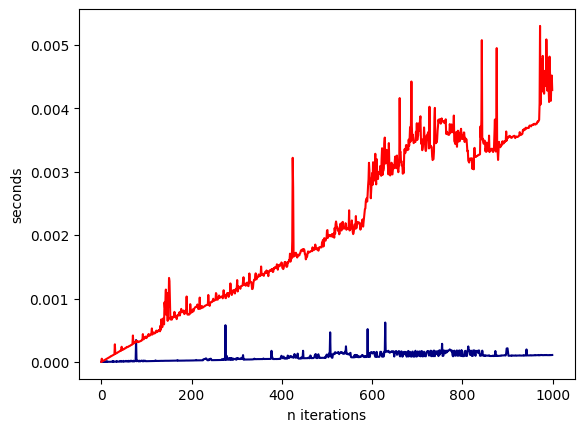

In [61]:
plt.plot(time_array, color='navy')
plt.plot(time_array_np, color='red')
plt.xlabel('n iterations')
plt.ylabel('seconds')
plt.show()

Sommer des cubes dans une triple boucle a une complexité de $\mathcal{O}(n^{3})$:

In [62]:
ntest = 150
time_array_cubic = np.empty(ntest)

# Cubic Time Complexity function: sum of squares using nested loops
for i in range(ntest):
    a = tm.time()
    sum_of_squares = 0
    for j in range(i):
        for k in range(j):
            for l in range(k):
                sum_of_squares += (j ** 2)
    b = tm.time()
    time_array_cubic[i] = b - a

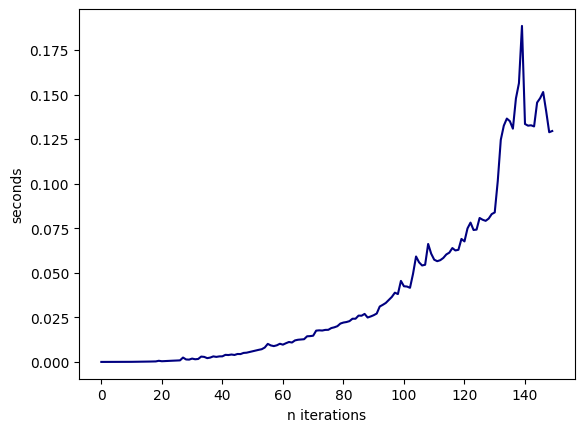

In [63]:
plt.plot(time_array_cubic, color='navy')
plt.xlabel('n iterations')
plt.ylabel('seconds')
plt.show()

---